In [1]:
import pandas as pd
import datetime as dt
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pprint import pprint
import numpy as np

In [2]:
file = "P:/prevodem.csv"
data = pd.read_csv(file, sep=',', index_col="Datum_Vystaveni"
                   )

In [3]:
#data.drop(columns=["Id", "PSC", "Country", "Nace_Kod", "Nace_name", "DateCreated", "DateFrom", "DateTo"], inplace=True)

In [3]:
print(data.shape)

(9285249, 5)


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9285249 entries, 2011-01-06 to 2019-12-02
Data columns (total 5 columns):
 #   Column           Dtype
---  ------           -----
 0   Rozdil           int64
 1   Splatnost        int64
 2   Parovani         int64
 3   Typ_uhrady       int64
 4   Typ_uhrady_Real  int64
dtypes: int64(5)
memory usage: 425.0+ MB
None


In [4]:
print(data.describe())

             Rozdil     Splatnost      Parovani    Typ_uhrady  Typ_uhrady_Real
count  9.285249e+06  9.285249e+06  9.285249e+06  9.285249e+06        9285249.0
mean   4.599629e+00  1.647441e+01  3.544713e-01  1.116742e+00              1.0
std    1.819296e+01  1.418950e+01  4.783528e-01  5.885970e-01              0.0
min   -2.900000e+01 -7.180000e+02  0.000000e+00  1.000000e+00              1.0
25%   -6.000000e+00  1.000000e+01  0.000000e+00  1.000000e+00              1.0
50%    0.000000e+00  1.400000e+01  0.000000e+00  1.000000e+00              1.0
75%    9.000000e+00  1.400000e+01  1.000000e+00  1.000000e+00              1.0
max    9.900000e+01  1.828000e+03  1.000000e+00  9.000000e+00              1.0


# Statistiky pro Rozdil

In [38]:
print('Průměr: ', data["Rozdil"].mean())
print('Medián: ', data["Rozdil"].median())
print('Standardní odchylka: ', data["Rozdil"].std())
print('Počet unikátních hodnot: ', data["Rozdil"].nunique())
print('Koeficient špičatosti: ', data["Rozdil"].kurtosis())
print('Největší doba splatnosti: ', data["Rozdil"].max())

Průměr:  4.599628722934624
Medián:  0.0
Standardní odchylka:  18.192964998384088
Počet unikátních hodnot:  129
Koeficient špičatosti:  5.663890719040204
Největší doba splatnosti:  99


In [33]:
korel = np.corrcoef(data["Splatnost"], data["Rozdil"])
print("Korelace mezi splatností a uhradou:%f3" %(korel[0,1]))

Korelace mezi splatností a uhradou:0.0600183


# Statistiky pro Splatnost

In [42]:
print('Průměr: ', data["Splatnost"].mean())
print('Medián: ', data["Splatnost"].median())
print('Standardní odchylka: ', data["Splatnost"].std())
print('Počet unikátních hodnot: ', data["Splatnost"].nunique())
print('Koeficient špičatosti: ', data["Splatnost"].kurtosis())
print('Největší doba splatnosti: ', data["Splatnost"].max())

Průměr:  16.474405802149192
Medián:  14.0
Standardní odchylka:  14.189496987760757
Počet unikátních hodnot:  477
Koeficient špičatosti:  126.39721474428768
Největší doba splatnosti:  1828


In [34]:
data["Splatnost"].value_counts()
data["Splatnost"].value_counts(normalize=True)*100

14     47.815099
7      10.525943
10      7.094715
30      5.746545
0       4.023435
         ...    
469     0.000011
468     0.000011
460     0.000011
459     0.000011
271     0.000011
Name: Splatnost, Length: 477, dtype: float64

In [43]:
splatnosti = np.unique(data.Splatnost, return_counts=True)
splatnost = splatnosti[0]
vyskyt = splatnosti[1]

In [44]:
d = {"Splatnost":splatnost, "Vyskyt":vyskyt}
splatnosti = pd.DataFrame(d)
print(splatnosti)

     Splatnost  Vyskyt
0         -718       1
1         -353       1
2         -328       1
3          -62       1
4          -56       1
..         ...     ...
472       1066       1
473       1074       2
474       1110       1
475       1751       1
476       1828       1

[477 rows x 2 columns]


In [45]:
splatnosti = splatnosti.drop(splatnosti[(splatnosti["Vyskyt"]<3)].index)
print(splatnosti)

     Splatnost  Vyskyt
11         -28       5
15         -19       3
16         -18       3
17         -17       3
18         -16       3
..         ...     ...
397        395       7
404        408       4
409        426       3
419        470       3
457        677       3

[333 rows x 2 columns]


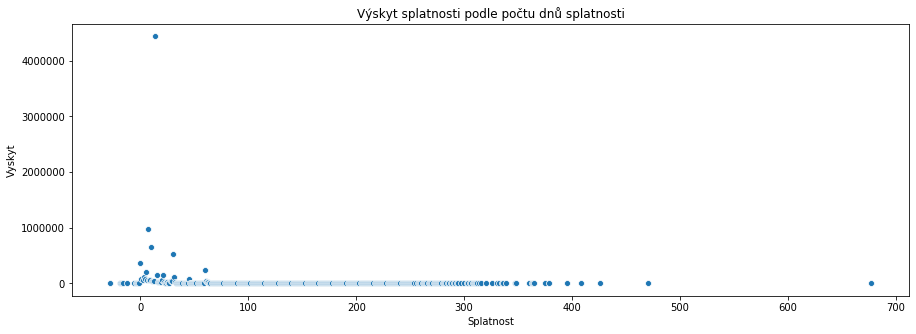

In [46]:
plt.figure(figsize=(15,5))
plt.title("Výskyt splatnosti podle počtu dnů splatnosti")
sns.scatterplot(x=splatnosti["Splatnost"], y =splatnosti["Vyskyt"] )

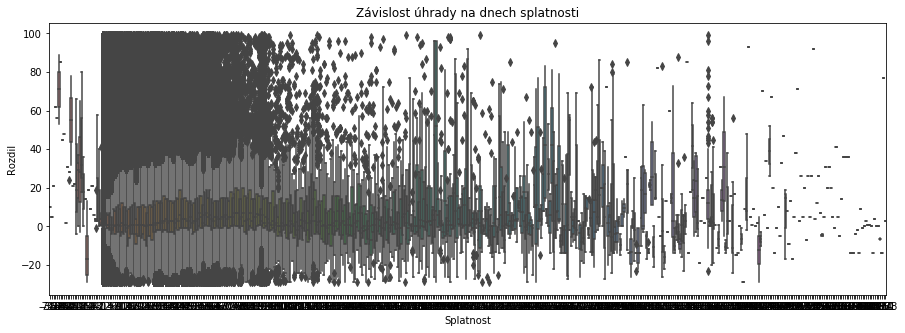

In [47]:
plt.figure(figsize=(15,5))
plt.title("Závislost úhrady na dnech splatnosti")
sns.boxplot(x=data["Splatnost"], y =data["Rozdil"])

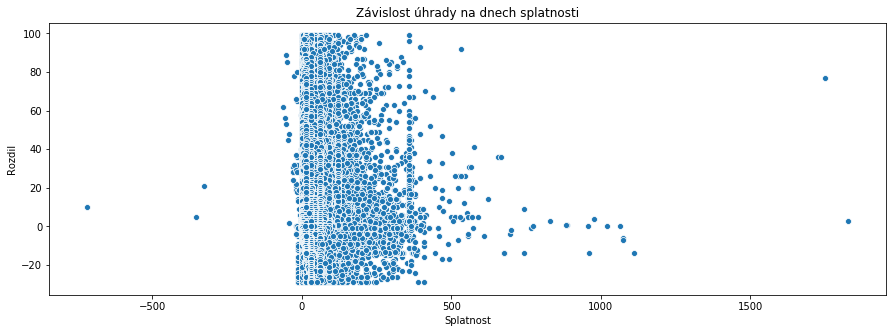

In [48]:
plt.figure(figsize=(15,5))
plt.title("Závislost úhrady na dnech splatnosti")
sns.scatterplot(x=data["Splatnost"], y =data["Rozdil"])

Počet redukovaných řádků: 36939160


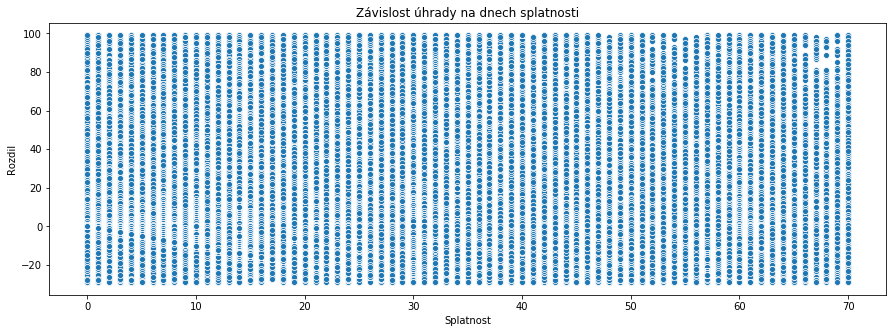

In [50]:
reduced = data[(data["Splatnost"]>=0) & (data["Splatnost"]<71)]
print("Počet redukovaných řádků:", reduced.size)
plt.figure(figsize=(15,5))
plt.title("Závislost úhrady na dnech splatnosti")
sns.scatterplot(x=reduced["Splatnost"], y =reduced["Rozdil"])

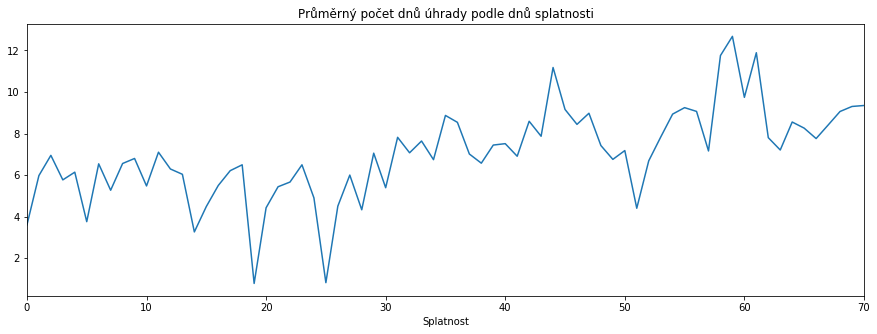

In [51]:
plt.figure(figsize=(15,5))
plt.title("Průměrný počet dnů úhrady podle dnů splatnosti")
reduced.groupby("Splatnost").mean()["Rozdil"].plot()

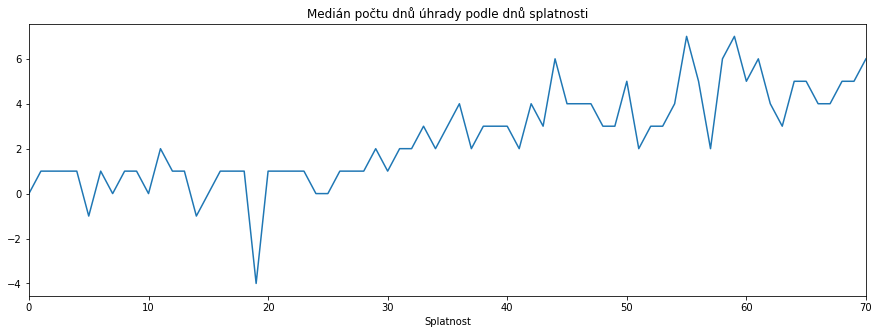

In [52]:
plt.figure(figsize=(15,5))
plt.title("Medián počtu dnů úhrady podle dnů splatnosti")
reduced.groupby("Splatnost").median()["Rozdil"].plot()

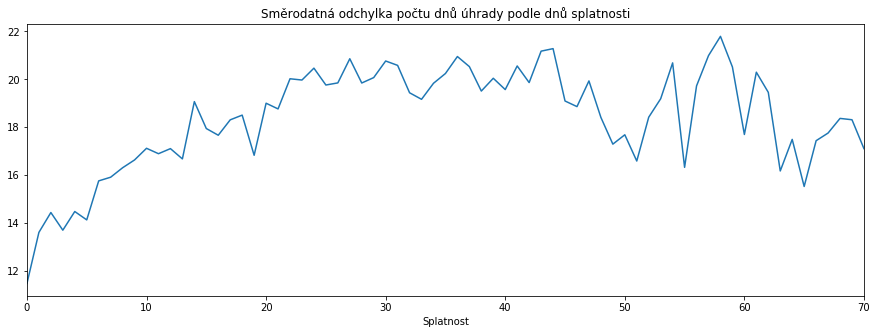

In [53]:
plt.figure(figsize=(15,5))
plt.title("Směrodatná odchylka počtu dnů úhrady podle dnů splatnosti")
reduced.groupby("Splatnost").std()["Rozdil"].plot()

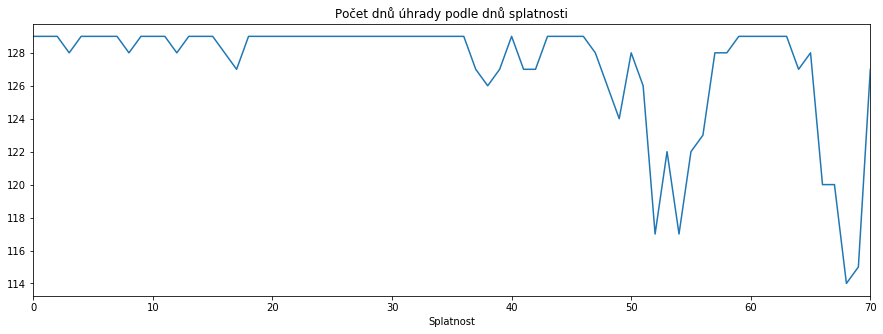

In [54]:
plt.figure(figsize=(15,5))
plt.title("Počet dnů úhrady podle dnů splatnosti")
reduced.groupby("Splatnost").nunique()["Rozdil"].plot()

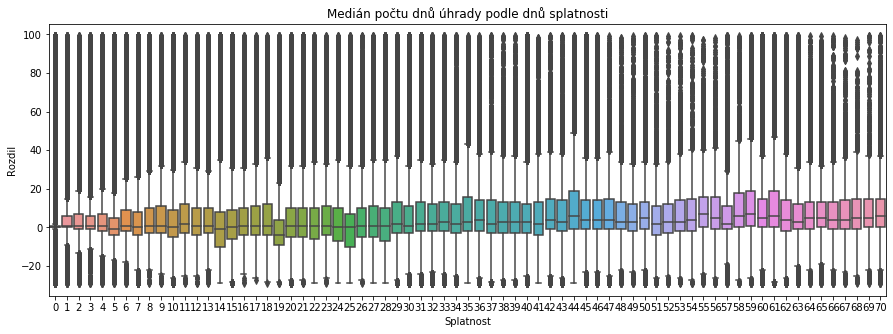

In [55]:
plt.figure(figsize=(15,5))
plt.title("Medián počtu dnů úhrady podle dnů splatnosti")
sns.boxplot(x=reduced["Splatnost"], y =reduced["Rozdil"])

# Vývoj průměrné doby úhrady v čase po měsících

In [97]:
df = data.reset_index()

In [98]:
print(df)

        Datum_Vystaveni  Rozdil  Splatnost  Parovani  Typ_uhrady  \
0            2011-01-06       8          0         0           1   
1            2011-01-01      -3          7         0           1   
2            2011-01-07      10          3         1           1   
3            2011-01-03      -3          7         0           1   
4            2011-01-07       0          4         1           1   
...                 ...     ...        ...       ...         ...   
9285244      2020-01-22     -29         30         0           1   
9285245      2019-12-31     -29         52         1           1   
9285246      2020-01-22     -29         30         1           1   
9285247      2019-12-31     -29         52         1           1   
9285248      2019-12-02      -5        104         1           1   

         Typ_uhrady_Real  
0                      1  
1                      1  
2                      1  
3                      1  
4                      1  
...                  

In [89]:
type(df["D_Vystaveni"][0])

pandas._libs.tslibs.timestamps.Timestamp

In [99]:
df["D_Vystaveni"] = [dt.datetime.strptime(d, "%Y-%m-%d") for d in df["Datum_Vystaveni"]]

In [100]:
df_par = df[df["Parovani"]==1]

In [101]:
byTime = df.groupby(df["D_Vystaveni"].dt.strftime('%Y-%m'))['Rozdil'].mean()
byTime_par = df_par.groupby(df_par["D_Vystaveni"].dt.strftime('%Y-%m'))['Rozdil'].mean()

In [91]:
byTime.head()

D_Vystaveni
2011-01    15.218750
2011-02    11.829670
2011-03    19.563177
2011-04    15.124309
2011-05     9.408964
Name: Rozdil, dtype: float64

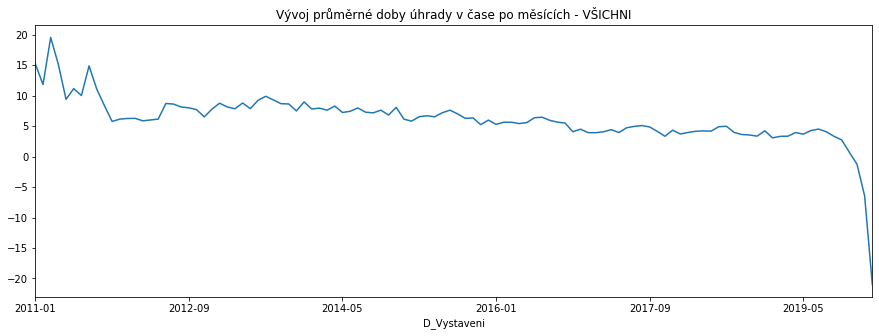

In [104]:
plt.figure(figsize=(15,5))
plt.title("Vývoj průměrné doby úhrady v čase po měsících - VŠICHNI")
byTime.plot()

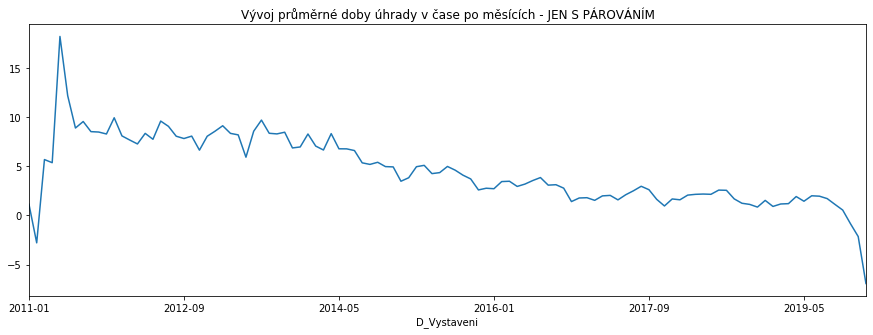

In [103]:
plt.figure(figsize=(15,5))
plt.title("Vývoj průměrné doby úhrady v čase po měsících - JEN S PÁROVÁNÍM")
byTime_par.plot()

In [114]:
diff = pd.concat([byTime_par, byTime], axis=1, sort=False)

In [116]:
diff.names = ["s par", "all"]

C:\Users\Root\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [115]:
diff.head()

,Rozdil,Rozdil
2011-01,1.142857,15.218750
2011-02,-2.791667,11.829670
2011-03,5.696970,19.563177
2011-04,5.378378,15.124309
2011-05,18.245283,9.408964
